## I-94 Traffic Project

In this project, we are going to analyze a dataset about the westbound traffic on the I-94 Interstate Highway in the US (cars moving from east to west). The traffic data recorded from a station located approximately midway between Minneapolis and Saint Paul.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc.

Dataset can be found [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

---


In [1]:
import pandas as pd

#### Read csv file using pandas

In [2]:
i94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

#### Explore dataset

In [3]:
i94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
i94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
i94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


**Observations:**
* The dataset has 48,204 rows and 9 columns, and there are no null values.
* Each row describes traffic and weather data for a specific hour.
* We have data from 2012-10-02 09:00:00 until 2018-09-30 23:00:00.
* Because the data is only for the westbound traffic in the proximity of the station, we should avoid generalizing our results for the entire I-94 highway.

#### Plot a histogram to visualize the distribution of the `traffic_volume` column.

In [6]:
import matplotlib.pyplot as plt

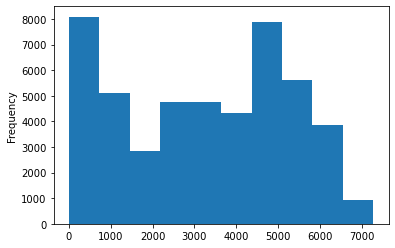

In [7]:
%matplotlib inline

i94['traffic_volume'].plot(kind='hist')
plt.show()

In [8]:
i94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

**Observations:**
* The hourly traffic volume from the dataset seems varied between 0 - 7280 cars, with an average of 3259 cars per hour.
* About 25% of the time, there were only 1193 cars or fewer passing the station each hour — this probably occurs during the night, or when a road is under construction.
* However, about 25% of the time, the traffic volume was four times as much (4933 cars or more).
* This observation gives our analysis an interesting direction: comparing daytime data with nighttime data.

#### Comparing daytime and nighttime traffic

We'll start by dividing the dataset into two parts:

* Daytime data: hours from 7 a.m. to 7 p.m. (12 hours)
* Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours)

In [9]:
i94['date_time'] = pd.to_datetime(i94['date_time'])

In [10]:
day = i94.copy()[(i94['date_time'].dt.hour >= 7) & (i94['date_time'].dt.hour < 19)]
print(day.shape)

night = i94.copy()[(i94['date_time'].dt.hour >= 19) | (i94['date_time'].dt.hour < 7)]
print(night.shape)

(23877, 9)
(24327, 9)


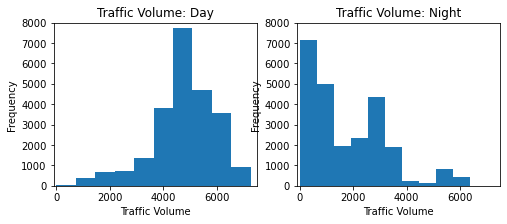

In [11]:
plt.figure(figsize=(8,3))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Day')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title('Traffic Volume: Night')
plt.ylabel('Frequency')
plt.xlabel('Traffic Volume')

plt.show()

In [12]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [13]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

**Observations:**
* Daytime traffic shows left skewed distribution which means most of the data has high traffic volume.
* Nighttime traffic show right skewed distribution which means most of the data has low traffic volume.
* Average night time traffic is 1/3 of daytime traffic.
* Because this project is to analyze heavy traffic, so we will only going to focus on daytime traffic.

#### Explore time indicators

One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:
* Month
* Day of the week
* Time of day

#### Time indicator: Month

In [14]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

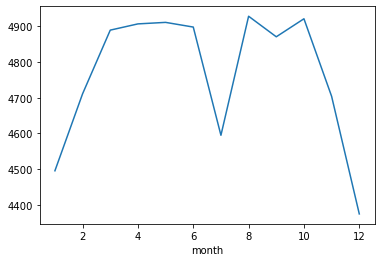

In [15]:
by_month['traffic_volume'].plot(kind='line')
plt.show()

**Observations:**
* The traffic looks less heavy during winter months (November–February) and becomes heavier during summer months (March–October), with one interesting exception: July.
* Why is traffic significantly less heavy in July each year?

In order to answer this question, we need to explore July data.

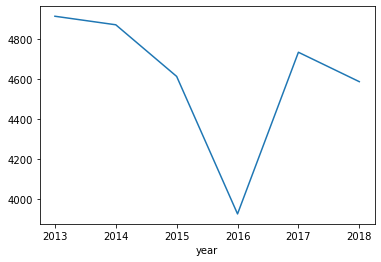

In [16]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

**Observations:**
* Typically, the traffic is pretty heavy in July, similar to the other warm months.
* The only exception is in July 2016 which had a high decrease in traffic volume. Possibly, there was a road construction happening during that time.

So, we can say that summer months generally show heavier traffic compared to winter months. In a summer month, there are almost 5000 cars passing throug every hour during daytime.

#### Time indicator: Day of the week

In [17]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

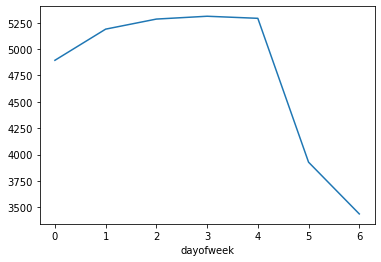

In [18]:
by_dayofweek['traffic_volume'].plot(kind='line')
plt.show()

**Observations:**
* The traffics are heavier during business days and reduce significantly during weekends with less than 4000 cars per hour.

#### Time indicator: Hour of the day

In [19]:
day['hour'] = day['date_time'].dt.hour
bussiness_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = bussiness_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64
hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


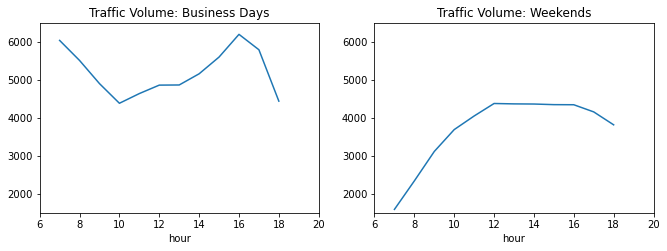

In [20]:
plt.figure(figsize=(11,3.5))

plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Traffic Volume: Business Days')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Traffic Volume: Weekends')
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.show()

**Observations:**
* At each hour of the day, the traffic volume is generally higher during business days compared to the weekends.
* The rush hours are around 7 and 16 — when most people travel from home to work and back, with the traffic over 6000 cars.

To summarize, we found a few time-related indicators of heavy traffic:
* The traffic is usually heavier during summer months (March–October) compared to winter months (November–February).
* The traffic is usually heavier on business days compared to weekends.
* On business days, the rush hours are around 7 and 16.

#### Check correlations between `traffic_volume` and weather

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather: `temp`, `rain_1h`, `snow_1h`, `clouds_all`, `weather_main`, `weather_description`.

We are going to check the correlation between these columns and `traffic_volume`.

In [21]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

**Observations:**
* `temp` shows the strongest correlation with a value of just +0.13.
* The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show strong correlations with `traffic_volume`.

We are going to plot to visualize the correlation between `temp` and `traffic_volume`.

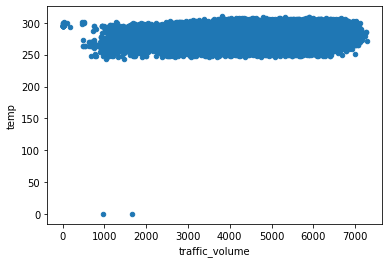

In [23]:
day.plot.scatter('traffic_volume', 'temp')
plt.show()

**Observations:**
* There are two zero values that mess up the plot. We need to fix these.

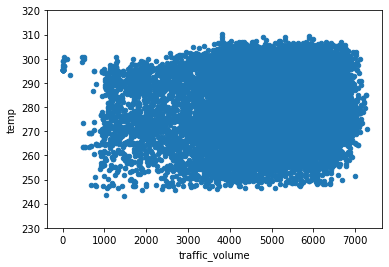

In [24]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230, 320)
plt.show()

**Observations:**
* From the plot, we can see that `temp` is not a solid indicator.
* We can conclude that we didn't find any reliable indicator of heavy traffic from the numerical weather columns.
* So, next we are going to explore the categorical weather-related columns: `weather_main` and `weather_description`.

#### Explore `weather_main` and `weather_description`

In [25]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

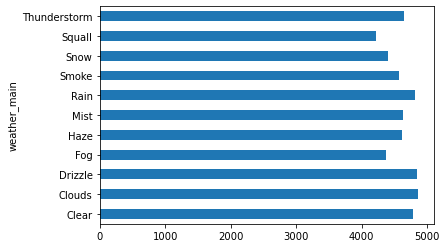

In [27]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

**Observations:**
* It looks like there's no weather type where traffic volume exceeds 5000 cars. They all look similar.

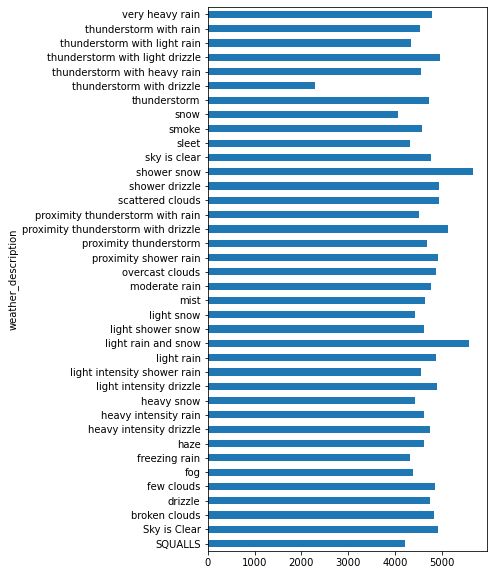

In [34]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

**Observations:**
* From the plot, we can see that there are two weather conditions that stood out which are `shower snow` and `light rain and snow` where there are more than 5000 cars.

#### Conclusion:

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway. We managed to find two types of indicators:
* Time indicators
    * The traffic is usually heavier during summer months (March–October) compared to winter months (November–February).
    * The traffic is usually heavier on business days compared to the weekends.
    * On business days, the rush hours are around 7 and 16.

* Weather indicators
    * Shower snow
    * Light rain and snow